



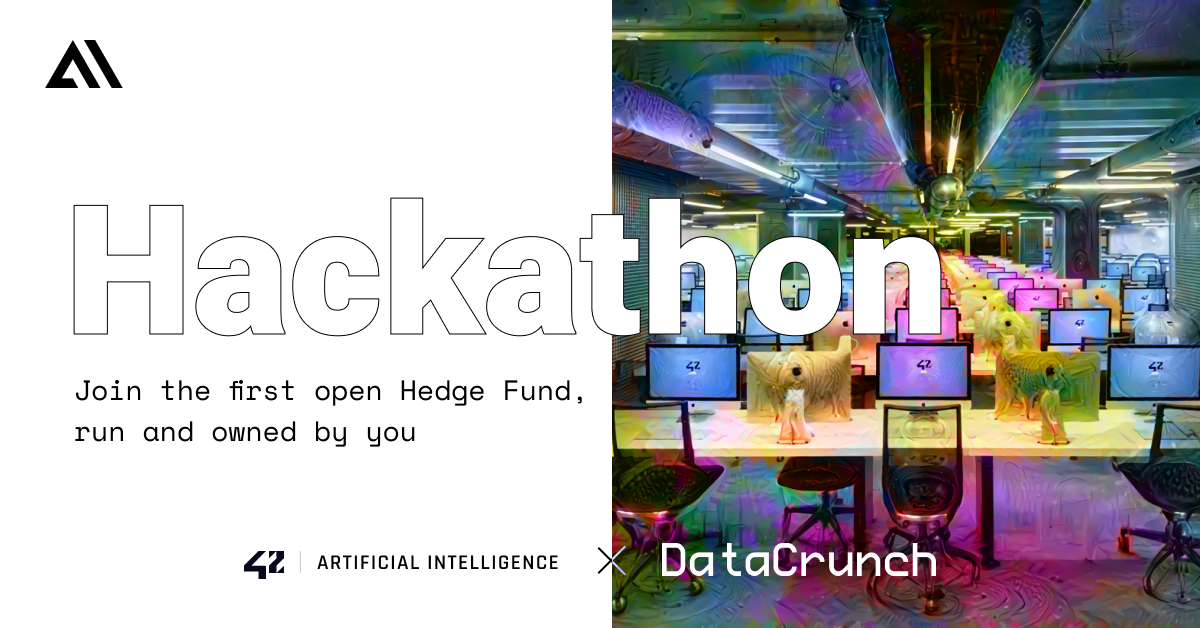

# QuickStart

##Basic step and workflow:

0 - Using this notebook

1 - Download data

2 - Explore data

3 - Choose and train a model

4 - Test model accuracy

5 - Make prediction

6 - Submit

---

## 0 - Using this notebook 

To execute the cell press `shift+enter`. 

Follow the steps and login with your Google account.

In [ ]:
# Lib & Dependencies
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 
import requests
from scipy import stats

# 1 - Download data

We will provide you with two dataset

- Training_data will be use to train your model.
- Hackathon_data will be use to make your prediciton.


There is three target you need to provide prediction on: target_r, target_g, target_b.




In [ ]:
# Data Download (may take a few minutes depending on your network)
train_datalink_X = 'https://tournament.datacrunch.com/data/X_train.csv'
train_datalink_y = 'https://tournament.datacrunch.com/data/y_train.csv'
hackathon_data_link = 'https://tournament.datacrunch.com/data/X_test.csv'

# Data for training
train_data = pd.read_csv(train_datalink_X)
# Data for which you will submit your prediction
test_data = pd.read_csv(hackathon_data_link)
# Targets to be predicted
train_targets = pd.read_csv(train_datalink_y)
# If don't want to take the probelm as a time serie
train_data.drop(columns=['Moons', 'id'], inplace = True)
test_data.drop(columns=['Moons', 'id'], inplace = True)

In [ ]:
display(train_data)
display(test_data)
display(train_targets)

# 2 - Explore Data

Data processing is one of the most important part. Observe your data and prepare carefully what you will give to your model for training.

In [ ]:
pd.set_option('display.max_columns', None)
print(train_data.describe())
print(test_data.describe())
print(train_targets.describe())

# 3 - Choose models

Crunch with originality!!! 👨🏻‍🏭

In [ ]:
def xg_boost_hackathon(data, target):
    X, y = data, target
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, shuffle=True)
    model = xgb.XGBRegressor(objective="reg:squarederror", max_depth=5, learning_rate=0.01, n_estimators=200, n_jobs=-1, colsample_bytree=0.5)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    accuracy_classification_report({'y_Actual': np.array(y_test), 'y_Predicted': preds})

    return model

# 4 - How we will compute your mean score

In [ ]:
def accuracy_classification_report(confusion_mtx):
    confusion_df = pd.DataFrame(confusion_mtx, columns=['y_Actual','y_Predicted'])    
    score = (stats.spearmanr(confusion_df['y_Actual'], confusion_df['y_Predicted']))[0]
    print('Score as calculated for the leader board (っಠ‿ಠ)っ {}'.format(score))

# Train your Models on targets

You can submit continious target if you want

In [ ]:
# Making prediction for target r
model_target_r = xg_boost_hackathon(train_data, train_targets.target_r)
# Making prediction for target g
model_target_g = xg_boost_hackathon(train_data, train_targets.target_g)
# Making prediction for target b
model_target_b = xg_boost_hackathon(train_data, train_targets.target_b)

Score as calculated for the leader board (っಠ‿ಠ)っ 0.07248772218034896
Score as calculated for the leader board (っಠ‿ಠ)っ 0.08986898542828083
Score as calculated for the leader board (っಠ‿ಠ)っ 0.12918087848188445


# 5 - Make prediction on the 3 targets

When you feel like your model is accurate enough it's time to predict the target and submit your results.

Repeat the operation on the three targets, concatenate the answers and submit.

**WARNING** 1/ Keep the raw order identical.

**WARNING** 2/ Be sure that your columns are named target_r, target-g adn target_b.

**WARNING** 3/ Your prediction need to be between 0 and 1.

**WARNING** 4/ Don't submit constant values.

In [ ]:
prediction = pd.DataFrame()
prediction['target_r'] = model_target_r.predict(test_data)
prediction['target_g'] = model_target_g.predict(test_data)
prediction['target_b'] = model_target_b.predict(test_data)

# 6 - Submit predictions

Past <u>your</u> API key here. You received it by email upon subscription and can find it on your leaderboard.


In [ ]:
API_KEY = "" # <- HERE

r = requests.post("https://tournament.datacrunch.com/api/submission",
    files = {
        "file": ("x", prediction.to_csv().encode('ascii'))
    },
    data = {
        "apiKey": API_KEY
    },
)

if r.status_code == 200:
    print("Submission submitted :)")
elif r.status_code == 423:
    print("ERR: Submissions are close")
    print("The submissions are not enabled because the hackathon hasn't started yet or is already finished.")
    print("Or the server is currently crunching the submitted files, please wait some time before retrying.")
elif r.status_code == 422:
    print("ERR: API Key is missing or empty")
    print("Did you forget to fill the API_KEY variable?")
elif r.status_code == 404:
    print("ERR: Unknown API Key")
    print("You should check that the provided API key is valid and is the same as the one you've received by email.")
elif r.status_code == 400:
    print("ERR: The file must not be empty")
    print("You have send a empty file.")
elif r.status_code == 401:
    print("ERR: Your email hasn't been verified")
    print("Please verify your email or contact a cruncher.")
elif r.status_code == 429:
    print("ERR: Too many submissions")
else:
    print("ERR: Server returned: " + str(r.status_code))
    print("Ouch! It seems that we were not expecting this kind of result from the server, if the probleme persist, contact a cruncher.")

ERR: Submissions are close
The submissions are not enabled because the hackathon hasn't started yet or is already finished.
Or the server is currently crunching the submitted files, please wait some time before retrying.


# How to improve your prediction




sklearn Docs
https://scikit-learn.org/stable/index.html

Tuning Tuning the hyper-parameters of an estimator 
https://scikit-learn.org/stable/modules/grid_search.html

Cross Validation (in Python and R) 
https://www.analyticsvidhya.com/blog/2018/05/improve-model-performance-cross-validation-in-python-r/

Possible ways to improve your prediction

1- Feature extraction and feature engineering; following methods are possible:

    princilpal component analysis (PCA)

    linear discriminant analysis (LDA)

    selecting best features (KBest)

    t-SNE method for feature engineering

    feature interactions using PolynomialFeatures

2- training multiple individual classifiers; these include:

    Keras neural networks

    Logistic regression

    Support vector machine

    Gaussian naive Bayes

    Random forrest classifier

    Extra trees classifier

    Gradient boost classifier

    AdaBoost classifier

    Bagging classifier

    Stochastic gradient descent

    K-Nearest neighbors

Grid search and cross validation are used with some of the classifiers in order to fine tune their hyperparameters. 

Pipelines are used for automating tasks when needed. 

Keras neural network can be easily reconfigured using different number of hidden layers and/or neurons per layer, along with different training algorithms.

3- aggregating individual classifiers using ensambling by soft voting, blending and stacking; possibilities include:

    blending with logistic regression

    blending with linear regression

    blending with Extremly randomised trees

    blending with Keras neural network classifier

    stacking with TensorFlow DNN classifier

    stacking with Extremly randomised trees

    stacking with Keras neural network classifier with Merged branches

    simple averageing of classifiers using different weights

In [ ]:
from google.colab import files
with open("prediciton.csv", "wb") as f:
    f.write(prediction.to_csv().encode('ascii'))
files.download('prediciton.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>